Question 1: Linear Regression with a Simple Dataset<br>
Description: Train a linear regression model using a simple dataset with only one feature. Use
scikit-learn to fit the model and predict the output.

In [52]:

#// Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

#// Generate random dataset (one feature)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature: 0-10
y = 2.5 * X + np.random.randn(100, 1)  # Target with noise

#// Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#// Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#// Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Predict on test set
y_pred = model.predict(X_test_scaled)
#Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9726835095657641


Question 2: Evaluation of a Linear Regression Model<br>
Description: Calculate the Mean Absolute Error and R-squared value for the linear regression
model trained in Question 1.

In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Generate random dataset (one feature)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature: 0-10
y = 2.5 * X + np.random.randn(100, 1)  # Target with noise

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.8014554834253328
R-squared: 0.9726835095657641


Question 3: Logistic Regression on a Binary Classification Problem<br>
Description: Train a logistic regression model using a simple binary classification dataset and make predictions.

Accuracy: 0.9
Confusion Matrix:
[[ 8  2]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



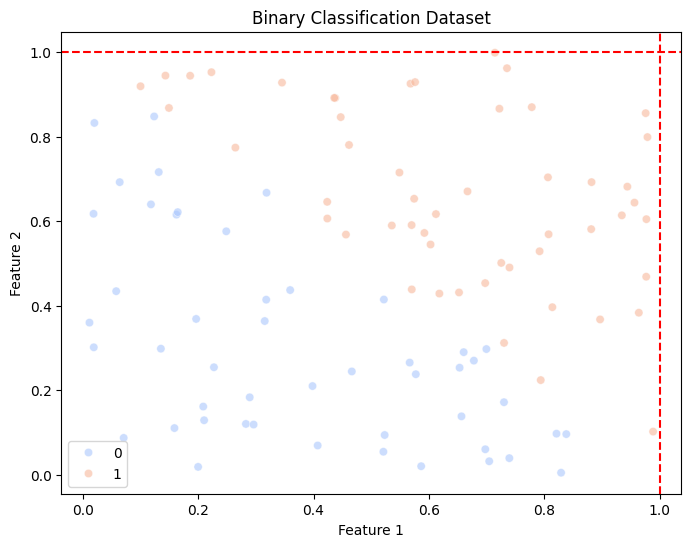

In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a simple binary classification dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target: 1 if sum of features > 1, else 0

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axvline(x=1, color='red', linestyle='--')  # Decision boundary
plt.axhline(y=1, color='red', linestyle='--')  # Decision boundary
plt.show()


Question 4: Visualize Data in Logistic Regression<br>
Description: Plot the dataset and the logistic regression decision boundary.

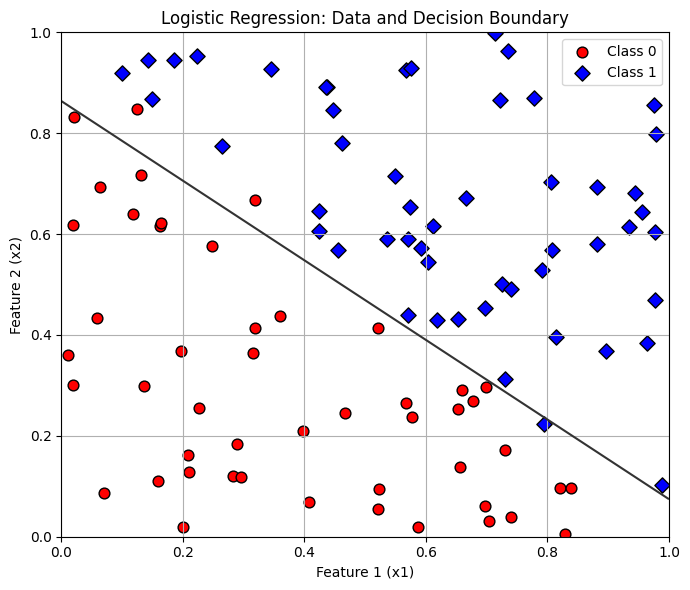

In [55]:
"""
Logistic Regression Visualization: Plot dataset points and decision boundary
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate a simple binary classification dataset (same logic as previous example)
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Target: 1 if sum of features > 1, else 0

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh grid of points to plot the decision boundary
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten meshgrid points and predict the class probabilities
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1]  # Probability of class 1
probs = probs.reshape(xx.shape)

# Plotting
plt.figure(figsize=(7, 6))
# Plot the decision boundary by contour where probability=0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

# Scatter plot of the original data points
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', label='Class 0', edgecolor='k', s=60)
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='D', label='Class 1', edgecolor='k', s=60)

plt.title('Logistic Regression: Data and Decision Boundary')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Question 5 : Train a Multiple Linear Regression Model<br>
Description: Train a linear regression model with multiple features.

In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Generate a synthetic dataset with multiple features
np.random.seed(0)
n_samples = 100
n_features = 3

# Create random features
X = np.random.rand(n_samples, n_features) * 10  # Features: 100 samples, 3 features (0-10)

# Create a target variable with a linear relationship and some noise
# y = 2 * x1 + 3 * x2 + 4 * x3 + noise
coefficients = np.array([2, 3, 4])
y = X @ coefficients + np.random.randn(n_samples)  # Linear combination with noise

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Coefficients: [1.98687598 2.97600782 4.0087117 ]
Intercept: 0.01633701247095587
Mean Absolute Error: 0.8002636716250697
R-squared: 0.9942512328273035


Question 6: Normalize Features for Linear Regression<br>
Description: Normalize features of a dataset before applying linear regression.

Mean Squared Error: 132.18
R-squared: 0.98


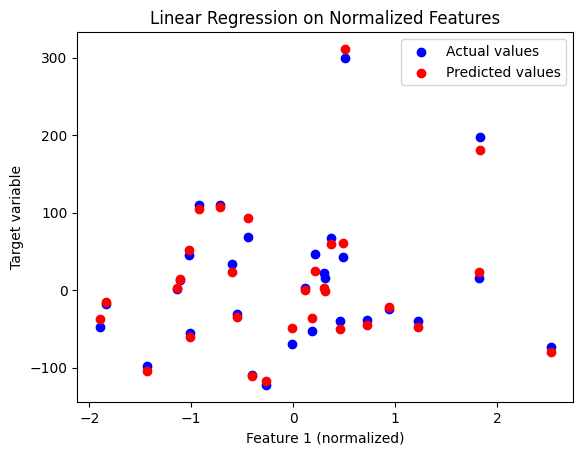

Coefficients: [  19.02568637  292.76360422 3921.38625138]
Intercept: 77.99788825532323
Mean Absolute Error: 0.8002636716252454
R-squared: 0.999999084814583


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Step 1: Generate a dataset with multiple features
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a linear regression model on the normalized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 7: Visualize the results for one feature (just for simplicity in plotting)
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual values')
plt.scatter(X_test_scaled[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Target variable')
plt.title('Linear Regression on Normalized Features')
plt.legend()
plt.show()# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Generate a synthetic dataset with multiple features
np.random.seed(0)
n_samples = 100
n_features = 3

# Create random features with different scales
X = np.random.rand(n_samples, n_features) * [10, 100, 1000]  # Features with different scales
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(n_samples)  # Target variable

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



Question 7: Logistic Regression with a Real-world Dataset<br>
Description: Use a real-world dataset like the Iris dataset to perform logistic regression with
multi-class classification.

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


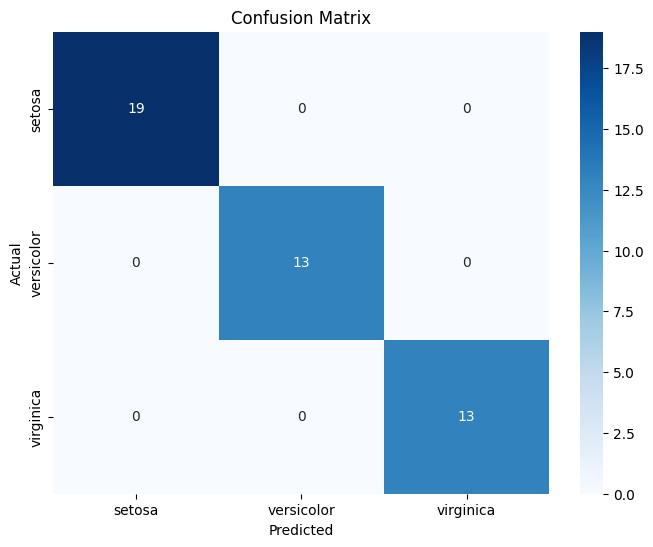

In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
def load_data():
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names
    return X, y, feature_names, target_names

# Step 2: Split the dataset into training and testing sets
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Step 3: Normalize the features
def normalize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Step 4: Train the Logistic Regression model
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Main execution workflow
if __name__ == "__main__":
    # Step 1: Load the data
    X, y, feature_names, target_names = load_data()

    # Step 2: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Step 3: Normalize the features
    X_train_scaled, X_test_scaled = normalize_features(X_train, X_test)

    # Step 4: Train the Logistic Regression model
    model = train_logistic_regression(X_train_scaled, y_train)

    # Step 5: Evaluate the model
    evaluate_model(model, X_test_scaled, y_test, target_names)


Question 8: Polynomial Regression<br>
Description: Train a polynomial regression model on a dataset by transforming input features into polynomial features.

Mean Squared Error: 56.27


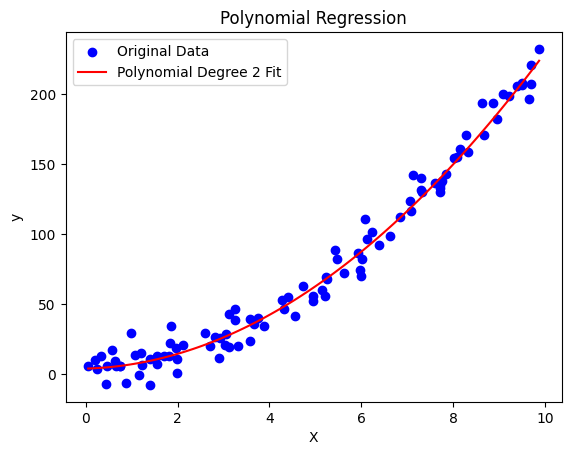

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create a simple dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points, single feature
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10  # Polynomial relationship with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Transform the features into polynomial features
degree = 2  # Set the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Train the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test_poly)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Visualize the result
plt.scatter(X, y, color='blue', label='Original Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range = model.predict(X_range_poly)

plt.plot(X_range, y_range, color='red', label=f"Polynomial Degree {degree} Fit")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


Question 9: Ridge Regression for Reducing Overfitting<br>
Description: Implement Ridge regression to handle potential overfitting in linear regression involving multiple features.

Mean Squared Error for Linear Regression: 218.71
Mean Squared Error for Ridge Regression: 234.56


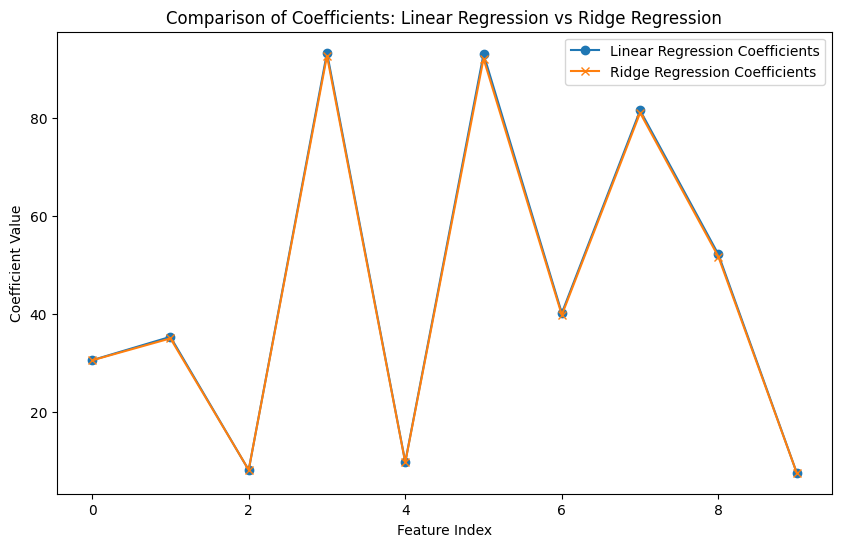

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create a synthetic dataset with multiple features
np.random.seed(42)
X, y = make_regression(n_samples=200, n_features=10, noise=15, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a standard linear regression model (for comparison)
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Step 4: Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions with both models
y_pred_lin_reg = lin_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Evaluate both models using Mean Squared Error
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Mean Squared Error for Linear Regression: {mse_lin_reg:.2f}")
print(f"Mean Squared Error for Ridge Regression: {mse_ridge:.2f}")

# Step 7: Visualize the impact of regularization (Ridge) on model coefficients
plt.figure(figsize=(10, 6))
plt.plot(lin_reg_model.coef_, label='Linear Regression Coefficients', marker='o')
plt.plot(ridge_model.coef_, label='Ridge Regression Coefficients', marker='x')
plt.title('Comparison of Coefficients: Linear Regression vs Ridge Regression')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Question 10: Logistic Regression with L2 Regularization<br>
Description: Apply L2 regularization (also known as Ridge regularization) to logistic regression to prevent overfitting.

Accuracy of Logistic Regression with L2 Regularization: 83.33%


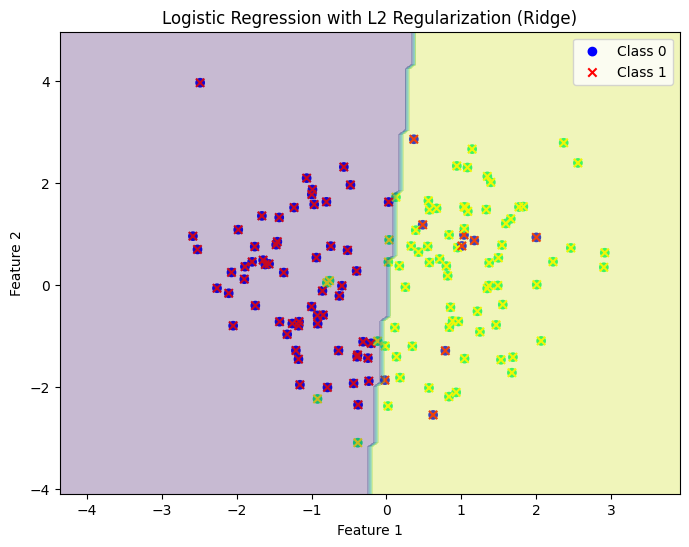

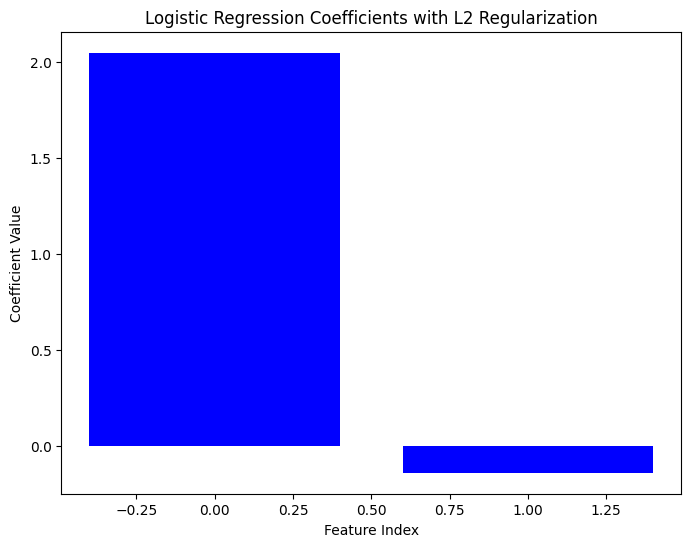

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a simple binary classification dataset
np.random.seed(42)
X, y = make_classification(
    n_samples=200,  # Number of samples
    n_features=2,   # Two features for easy visualization
    n_informative=2,
    n_classes=2,    # Two classes for binary classification
    n_redundant=0,  # No redundant features
    n_repeated=0,   # No repeated features
    random_state=42
)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply Logistic Regression with L2 Regularization (Ridge regularization)
log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=1.0)  # 'C' is the inverse of regularization strength
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression with L2 Regularization: {accuracy * 100:.2f}%")

# Step 5: Visualize the effect of regularization on the coefficients
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='o', label='Class 0')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', marker='x', label='Class 1')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.title("Logistic Regression with L2 Regularization (Ridge)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Step 6: Visualize the learned coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(log_reg.coef_[0])), log_reg.coef_[0], color='blue')
plt.title("Logistic Regression Coefficients with L2 Regularization")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()
